<a href="https://colab.research.google.com/github/dlguswn3659/2020_Image_Lab/blob/master/data_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Set the random seed number for reproducible results
seedNum = 1

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
# Set the TensorFlow version to 2.x in Colab
%tensorflow_version 2.x

In [7]:
import random
random.seed(seedNum)
import numpy as np
np.random.seed(seedNum)
import tensorflow as tf
tf.random.set_seed(seedNum)
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import math
import os
import sys
import shutil
import urllib.request
import zipfile
import smtplib
from matplotlib import pyplot
from matplotlib.image import imread
from datetime import datetime
from email.message import EmailMessage

In [8]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, 
and then re-execute this cell.


In [9]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	fig, axs = pyplot.subplots(2, 1, figsize=(12,12))
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='red', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='red', label='test')
	pyplot.show()

In [10]:
# Begin the timer for the script processing
startTimeScript = datetime.now()

# Set up the number of CPU cores available for multi-thread processing
n_jobs = -1
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Set up the flag to stop sending progress emails (setting to True will send status emails!)
notifyStatus = False

# Set up the mountStorage flag to mount G Drive for storing files (setting True will mount the drive!)
mountStorage = False

Num GPUs Available:  0


In [11]:

# Colab-Specific Setup - Mount Google Drive for storing downloaded files
if (mountStorage):
    from google.colab import drive
    drive.mount('/content/gdrive')

In [12]:
# Set the default optimizer for the remaining portion of the script
default_opt = Adam(learning_rate=0.001)

# **Section 1. Data Preparation**

In [13]:
# !kaggle competitions download -c siim-isic-melanoma-classification
# !unzip siim-isic-melanoma-classification.zip

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
unzip:  cannot find or open siim-isic-melanoma-classification.zip, siim-isic-melanoma-classification.zip.zip or siim-isic-melanoma-classification.zip.ZIP.


In [15]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"caualliswell","key":"962dcfab4cd60c8fd1aba130fc0b9d2d"}'}

In [16]:
ls -1ha kaggle.json

kaggle.json


In [17]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started      Kudos        133           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       2980           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      22949           False  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge       5023           False  
connectx                                       2030-01-01 00:00:00  Getting Started  Knowledge        689           False  
nlp-getting-started                            2030-01-01 00:00:00  Getting Started      Kudos       1465           False  
competit

In [18]:
! kaggle competitions download -c siim-isic-melanoma-classification

 94% 178M/190M [00:02<00:00, 103MB/s] 
100% 190M/190M [00:02<00:00, 91.8MB/s]
 91% 172M/189M [00:01<00:00, 104MB/s] 
100% 189M/189M [00:01<00:00, 106MB/s]
 98% 185M/189M [00:02<00:00, 99.3MB/s]
100% 189M/189M [00:02<00:00, 96.4MB/s]
 94% 177M/188M [00:01<00:00, 62.9MB/s]
100% 188M/188M [00:01<00:00, 103MB/s] 
 93% 177M/191M [00:02<00:00, 56.7MB/s]
100% 191M/191M [00:02<00:00, 72.8MB/s]
 95% 179M/188M [00:01<00:00, 119MB/s]
100% 188M/188M [00:02<00:00, 97.0MB/s]
 94% 178M/190M [00:02<00:00, 61.4MB/s]
100% 190M/190M [00:03<00:00, 66.1MB/s]
 93% 174M/186M [00:02<00:00, 83.2MB/s]
100% 186M/186M [00:02<00:00, 79.4MB/s]
 95% 180M/189M [00:01<00:00, 118MB/s]
100% 189M/189M [00:01<00:00, 106MB/s]
100% 554M/555M [00:05<00:00, 85.3MB/s]
100% 555M/555M [00:05<00:00, 98.8MB/s]
100% 553M/554M [00:05<00:00, 106MB/s] 
100% 554M/554M [00:05<00:00, 101MB/s]
 92% 172M/187M [00:01<00:00, 129MB/s]
100% 187M/187M [00:01<00:00, 124MB/s]
 99% 187M/188M [00:01<00:00, 117MB/s] 
100% 188M/188M [00:01<00:00, 101

In [19]:
!ls

drive		      ISIC_0076801.jpg	    ISIC_0092481.jpg.zip
ISIC_0015719.dcm.zip  ISIC_0076995.dcm.zip  ISIC_0095455.dcm.zip
ISIC_0015719.jpg.zip  ISIC_0076995.jpg	    ISIC_0095455.jpg.zip
ISIC_0052060.dcm.zip  ISIC_0077472.dcm.zip  ISIC_0095790.dcm.zip
ISIC_0052060.jpg.zip  ISIC_0077472.jpg.zip  ISIC_0095790.jpg.zip
ISIC_0052212.dcm.zip  ISIC_0077586.dcm	    ISIC_0097719.dcm.zip
ISIC_0052212.jpg      ISIC_0077586.jpg	    ISIC_0097719.jpg
ISIC_0052349.dcm.zip  ISIC_0077735.dcm.zip  ISIC_0099348.dcm
ISIC_0052349.jpg.zip  ISIC_0077735.jpg.zip  ISIC_0099348.jpg
ISIC_0058510.dcm.zip  ISIC_0078703.dcm.zip  kaggle.json
ISIC_0058510.jpg.zip  ISIC_0078703.jpg.zip  sample_data
ISIC_0068279.dcm.zip  ISIC_0078712.dcm.zip  sample_submission.csv
ISIC_0068279.jpg      ISIC_0078712.jpg	    test00-687.tfrec.zip
ISIC_0073313.dcm.zip  ISIC_0079038.dcm.zip  test01-687.tfrec.zip
ISIC_0073313.jpg.zip  ISIC_0079038.jpg.zip  test02-687.tfrec.zip
ISIC_0073502.dcm      ISIC_0080512.dcm.zip  test03-687.tfrec.zip
ISI

In [ ]:
!unzip siim-isic-melanoma-classification.zip

In [20]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"caualliswell","key":"962dcfab4cd60c8fd1aba130fc0b9d2d"}'}

In [21]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 68 Jul  7 10:51 kaggle.json


In [22]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [23]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [24]:
# List available datasets.
!kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge             COVID-19 Open Research Dataset Challenge (CORD-19)    3GB  2020-07-06 18:49:31          86049  
roche-data-science-coalition/uncover                          UNCOVER COVID-19 Challenge                          179MB  2020-05-21 18:57:53          14958  
oleksastepaniuk/prozorro-public-procurement-dataset           ProZorro. Ukrainian public procurement dataset      448MB  2020-04-15 17:09:37              4  
navinmundhra/daily-power-generation-in-india-20172020         Daily Power Generation in India (2017-2020)          63KB  2020-06-29 17:13:29             58  
mrmorj/data-police-shootings                        

In [26]:
# Copy the stackoverflow data set locally.
# !kaggle datasets download -d siim-isic-melanoma-classification
! kaggle competitions download -c siim-isic-melanoma-classification

ISIC_0058510.jpg.zip: Skipping, found more recently modified local copy (use --force to force download)
ISIC_0099348.jpg: Skipping, found more recently modified local copy (use --force to force download)
ISIC_0082785.jpg: Skipping, found more recently modified local copy (use --force to force download)
ISIC_0052060.jpg.zip: Skipping, found more recently modified local copy (use --force to force download)
ISIC_0076801.jpg: Skipping, found more recently modified local copy (use --force to force download)
ISIC_0073502.jpg: Skipping, found more recently modified local copy (use --force to force download)
ISIC_0087243.jpg.zip: Skipping, found more recently modified local copy (use --force to force download)
ISIC_0074618.jpg: Skipping, found more recently modified local copy (use --force to force download)
ISIC_0077586.jpg: Skipping, found more recently modified local copy (use --force to force download)
ISIC_0082004.jpg: Skipping, found more recently modified local copy (use --force to forc

In [ ]:
# !head ~/.kaggle/datasets/stackoverflow/stack-overflow-2018-developer-survey/survey_results_public.csv

FileNotFoundError: ignored

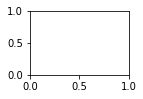

In [14]:
# plot dog photos from the dogs vs cats dataset

# define location of dataset
folder = 'jpeg/train/'
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# define filename
	filename = folder + 'ISIC_0015719' + '.jpg'
	# load image pixels
	image = imread(filename)
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()